In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

from aging.plotting import figure, format_plots, save_factory, PlotConfig

In [2]:
c = PlotConfig()

In [3]:
c

PlotConfig(save_path=PosixPath('/n/groups/datta/win/figures/ontogeny'), dana_save_path=PosixPath('/n/groups/datta/Dana/Ontogeny/figs'))

In [4]:
format_plots()

In [5]:
saver = save_factory(c.save_path / "fig_01-size", tight_layout=False)

In [6]:
df = pl.scan_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_males_syllable_df_v00.parquet')

In [7]:
df.head().collect()

experiment,file,uuid,date,age,syllables,true_depth,session_name,subject_name,timestamps,raw_timestamps,area_mm,area_px,centroid_x_mm,centroid_x_px,centroid_y_mm,centroid_y_px,height_ave_mm,length_mm,length_px,velocity_2d_mm,velocity_2d_px,velocity_3d_mm,velocity_3d_px,width_mm,width_px,angle,velocity_theta,recon_width,recon_length,recon_height,recon_area,onsets,mouse
str,str,str,datetime[μs],i64,i16,f32,str,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,bool,str
"""ontogeny_males…","""/n/groups/datt…","""87fbe972-825e-…",2023-12-02 09:29:02,12,86,677.0,"""otgy_12M_01""","""12M_01_04""",0.0,1.5179e6,1789.335693,1084.0,-381.155731,22.061506,-75.19487,167.028564,35.14299,74.111633,45.48682,0.0,0.0,0.0,0.0,58.839687,35.189972,2.692753,0.0,21.026773,41.215134,41.864784,713.0,true,"""12M_01_04"""
"""ontogeny_males…","""/n/groups/datt…","""87fbe972-825e-…",2023-12-02 09:29:02,12,86,677.0,"""otgy_12M_01""","""12M_01_04""",0.033333,1.5179e6,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,false,"""12M_01_04"""
"""ontogeny_males…","""/n/groups/datt…","""87fbe972-825e-…",2023-12-02 09:29:02,12,86,677.0,"""otgy_12M_01""","""12M_01_04""",0.066667,1.5179e6,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,false,"""12M_01_04"""
"""ontogeny_males…","""/n/groups/datt…","""87fbe972-825e-…",2023-12-02 09:29:02,12,86,677.0,"""otgy_12M_01""","""12M_01_04""",0.1,1.5179e6,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,false,"""12M_01_04"""
"""ontogeny_males…","""/n/groups/datt…","""87fbe972-825e-…",2023-12-02 09:29:02,12,86,677.0,"""otgy_12M_01""","""12M_01_04""",0.133333,1.5179e6,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,false,"""12M_01_04"""


In [8]:
areas = df.group_by(["age", "uuid"], maintain_order=True).agg(pl.col("area_mm").mean()).collect()

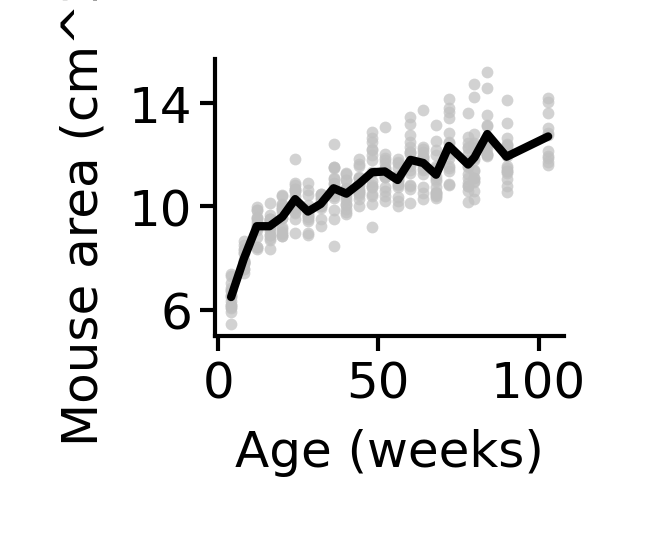

In [9]:
fig = figure(0.75, 0.6)
ax = sns.scatterplot(
    data=areas.with_columns(pl.col("area_mm") / 100),
    x="age",
    y="area_mm",
    color="silver",
    s=2,
    lw=0,
    alpha=0.7
)
ax = sns.lineplot(
    data=areas.with_columns(pl.col("area_mm") / 100),
    x="age",
    y="area_mm",
    err_kws=dict(lw=0),
    errorbar=None,
    color="k",
)
ax.set(
    xlabel="Age (weeks)",
    ylabel="Mouse area (cm^2)",
    yticks=[6, 10, 14],
    xticks=[0, 50, 100],
)
sns.despine()
saver(fig, "area-vs-age-ontogeny-males");

In [10]:
vel = df.group_by(["age", "uuid"], maintain_order=True).agg(pl.col("velocity_2d_mm").mean()).with_columns(pl.col("velocity_2d_mm") * 30).collect()

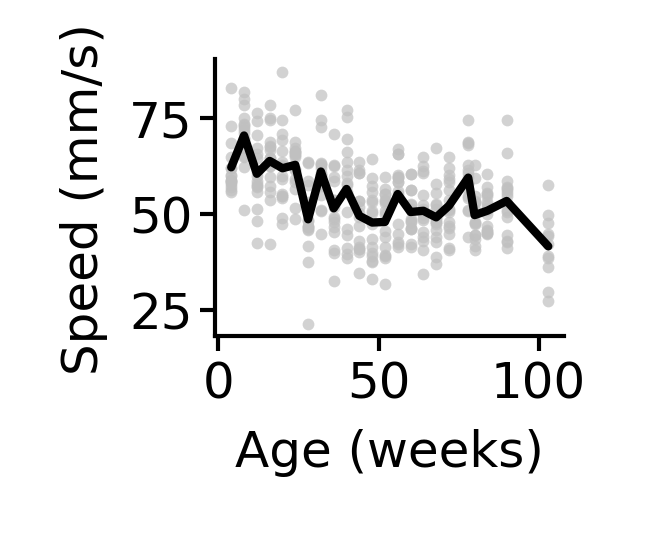

In [11]:
fig = figure(0.75, 0.6)
ax = sns.scatterplot(
    data=vel,
    x="age",
    y="velocity_2d_mm",
    color="silver",
    s=2,
    lw=0,
    alpha=0.7
)
ax = sns.lineplot(
    data=vel,
    x="age",
    y="velocity_2d_mm",
    err_kws=dict(lw=0),
    errorbar=None,
    color="k",
)
ax.set(
    xlabel="Age (weeks)",
    ylabel="Speed (mm/s)",
    xticks=[0, 50, 100],
)
sns.despine()
saver(fig, "speed-vs-age-ontogeny-males");

In [12]:
height = df.group_by(["age", "uuid"], maintain_order=True).agg(pl.col("height_ave_mm").mean()).collect()

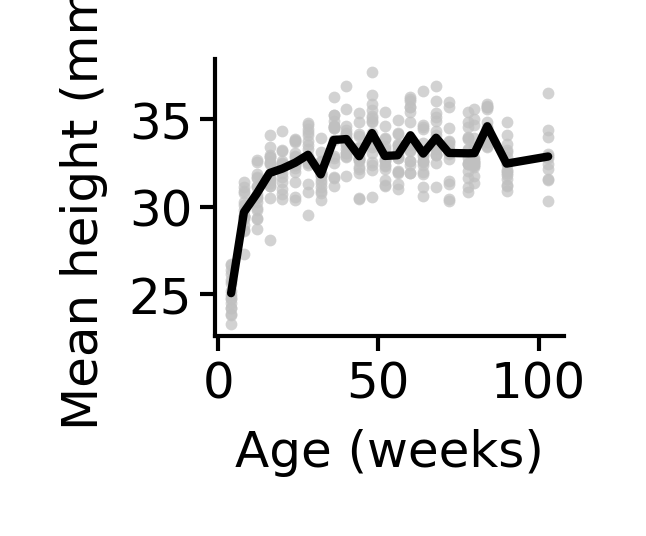

In [13]:
fig = figure(0.75, 0.6)
ax = sns.scatterplot(
    data=height,
    x="age",
    y="height_ave_mm",
    color="silver",
    s=2,
    lw=0,
    alpha=0.7
)
ax = sns.lineplot(
    data=height,
    x="age",
    y="height_ave_mm",
    err_kws=dict(lw=0),
    errorbar=None,
    color="k",
)
ax.set(
    xlabel="Age (weeks)",
    ylabel="Mean height (mm)",
    xticks=[0, 50, 100],
)
sns.despine()
saver(fig, "height-vs-age-ontogeny-males");